In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot:xlabel='placement_exam_marks'>

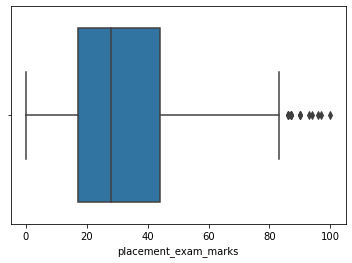

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [16]:
#finding the percentile of 25th and 75th
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [17]:
percentile25

17.0

In [18]:
percentile75

44.0

In [19]:
iqr=percentile75 - percentile25

In [20]:
iqr

27.0

In [23]:
#calculate the limitation
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [24]:
upper_limit

84.5

In [26]:
lower_limit

-23.5

In [27]:
#outliers
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [28]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# trimming

In [29]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [30]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot:xlabel='placement_exam_marks'>

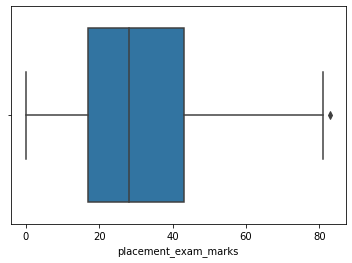

In [32]:
sns.boxplot(new_df['placement_exam_marks'])

# capping

In [34]:
df['placement_exam_marks']=np.where(df['placement_exam_marks']>upper_limit,upper_limit,
        np.where(df['placement_exam_marks']<lower_limit,lower_limit,df['placement_exam_marks']))

In [36]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000
